<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Hossein Anjidani

**Student ID**: 400100746


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

# Answer: Soft-Margin SVM: Theory and Implementation

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful. Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem.

## Theoretical Questions

### 1. Derive the Dual Optimization Problem for the Soft-Margin SVM

The primal problem for the Soft-Margin SVM is given by:

$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i
$ subject to:
$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i = 1, \ldots, N
$

To derive the dual, we start by forming the Lagrangian for this constrained optimization problem. We introduce Lagrange multipliers $\alpha_i \geq 0$ for the first set of constraints and $\mu_i \geq 0$ for the second set:

$\mathcal{L}(w, b, \xi, \alpha, \mu) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i - \sum_{i=1}^N \alpha_i \left[ y_i (w^T x_i + b) - 1 + \xi_i \right] - \sum_{i=1}^N \mu_i \xi_i
$

Taking the partial derivatives of the Lagrangian with respect to $w, b$, and $x^i_i$ and setting them to zero gives:

1. $\frac{\partial \mathcal{L}}{\partial w} = 0 \Rightarrow w = \sum_{i=1}^N \alpha_i y_i x_i$
2. $\frac{\partial \mathcal{L}}{\partial b} = 0 \Rightarrow \sum_{i=1}^N \alpha_i y_i = 0$
3. $\frac{\partial \mathcal{L}}{\partial \xi_i} = 0 \Rightarrow C - \alpha_i - \mu_i = 0 \Rightarrow \alpha_i \leq C$

Substituting these conditions back into the Lagrangian to eliminate $w, b,$ and $x_i$, we obtain the dual problem:


$\max_{\alpha} \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j x_i^T x_j
$ subject to: $\sum_{i=1}^N \alpha_i y_i = 0$ and
$0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N$


### 2. How to Calculate the Weights and Bias Using the Dual Problem Optimum Points?

Once we solve the dual problem and obtain the optimal $\alpha^*$, we can calculate the weight vector $w$ using:

$
w = \sum_{i=1}^N \alpha_i^* y_i x_i
$

To find the bias term $b$, we use the support vectors, which are the data points where $0 < \alpha_i < C$. For any such support vector $x_i$, the following condition holds:

$y_i (w^T x_i + b) = 1$

We can solve for $b$:

$b = y_i - \sum_{j=1}^N \alpha_j^* y_j x_j^T x_i$

### 3. How to Classify New Data Points Using the Optimal Weights and Bias?

To classify a new data point $x$, we compute the decision function:

$f(x) = w^T x + b = \sum_{i=1}^N \alpha_i^* y_i x_i^T x + b$

The sign of \(f(x)\) determines the class of \(x\):

- If \(f(x) > 0\), classify \(x\) as positive (\(y = +1\)).
- If \(f(x) < 0\), classify \(x\) as negative (\(y = -1\)).

Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [27]:
import numpy as np
import cvxpy as cp
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
import os
from sklearn.model_selection import KFold

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [2]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/UNI/Sem 6/ML/CHW4/Q3'

Mounted at /content/drive


In [3]:
# Load datasets
df1 = pd.read_csv(os.path.join(folder_path,'DF1.csv'))
df2 = pd.read_csv(os.path.join(folder_path,'DF2.csv'))
df3 = pd.read_csv(os.path.join(folder_path,'DF3.csv'))

# Show the first 5 rows of each dataset
print("First 5 rows of DF1:")
print(df1.head())
print("\nFirst 5 rows of DF2:")
print(df2.head())
print("\nFirst 5 rows of DF3:")
print(df3.head())


First 5 rows of DF1:
         x1        x2  y
0  6.462652  5.121478 -1
1 -6.586541 -7.721287  1
2  9.239683 -8.595738 -1
3  4.250052  2.143755  1
4  8.219779 -3.609733 -1

First 5 rows of DF2:
         x1         x2  y
0  2.937145  77.102291  1
1 -0.029344  44.802353  1
2  5.868818  44.595757 -1
3  8.609281  49.223945 -1
4  7.763276 -14.340750 -1

First 5 rows of DF3:
         x1        x2  y
0 -0.517768 -0.466158 -1
1  0.940985  0.235175  1
2 -0.470720  0.917120  1
3  0.712716 -0.097401 -1
4 -0.608773 -0.107034 -1


Use the following function to visualize the datapoints for all datasets.


Visualizing Dataset 1:


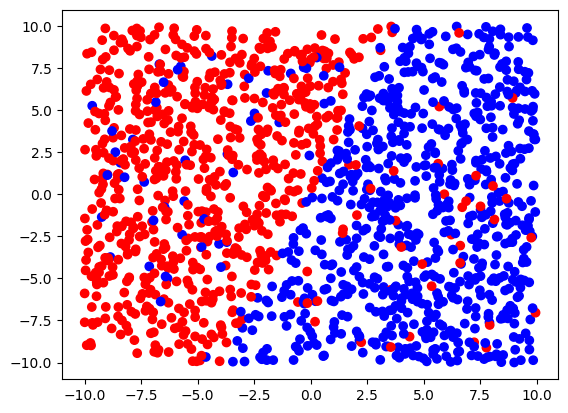


Visualizing Dataset 2:


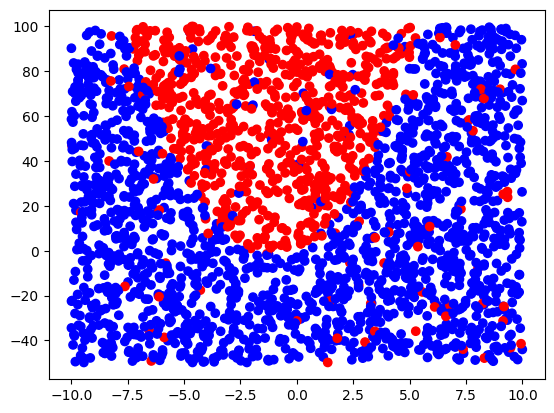


Visualizing Dataset 3:


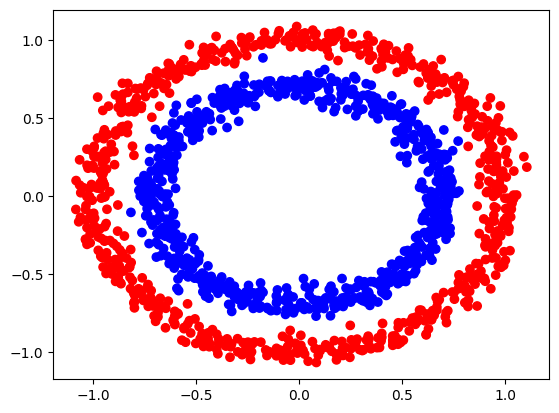

In [4]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.show()

# Extract features and labels
X1, y1 = df1.iloc[:, :-1].values, df1.iloc[:, -1].values
X2, y2 = df2.iloc[:, :-1].values, df2.iloc[:, -1].values
X3, y3 = df3.iloc[:, :-1].values, df3.iloc[:, -1].values

# Visualize the datasets
print("\nVisualizing Dataset 1:")
visualize_data(X1, y1)
print("\nVisualizing Dataset 2:")
visualize_data(X2, y2)
print("\nVisualizing Dataset 3:")
visualize_data(X3, y3)


**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

**DF1:** Linear kernel

**DF2:** Polynomial

**DF1:** RBF



## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.


Visualizing Training Set:


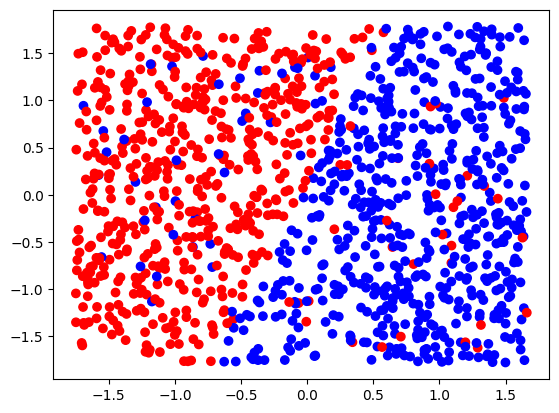


Visualizing Test Set:


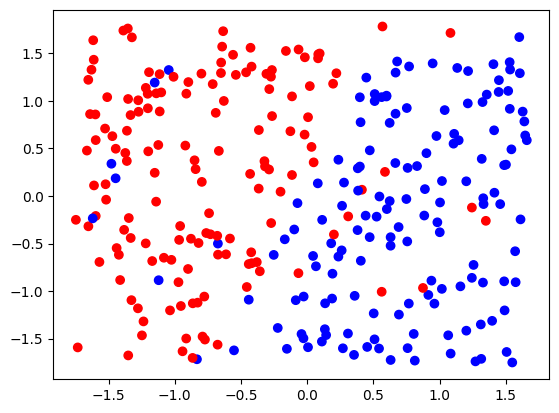

In [16]:
# Load and display data
df1 = pd.read_csv(os.path.join(folder_path,'DF1.csv'))
df1 = df1.values
# Data preparation for DF1
X1 = df1[:, :2]
y1 = df1[:, 2]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

X1_train_scaled = pipeline1.fit_transform(X1_train)
X1_test_scaled = pipeline1.transform(X1_test)
print("\nVisualizing Training Set:")
visualize_data(X1_train_scaled, y1_train)
print("\nVisualizing Test Set:")
visualize_data(X1_test_scaled, y1_test)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [17]:
# Compute kernel matrix
K1 = np.dot(X1_train_scaled, X1_train_scaled.T)

# Compute matrix P
Y1 = np.outer(y1_train, y1_train)
P1 = np.multiply(Y1, K1)
P1 = 0.5 * (P1 + P1.T)  # Ensure P is symmetric

# Ensure that P is positive semi-definite
eigvals1 = np.linalg.eigvalsh(P1)
if np.any(eigvals1 < 0):
    P1 += np.eye(P1.shape[0]) * (-np.min(eigvals1) + 1e-5)  # Regularize to make positive semi-definite

# Define the optimization problem
alpha1 = cp.Variable(X1_train_scaled.shape[0])
C1 = 10
objective1 = cp.Maximize(cp.sum(alpha1) - 0.5 * cp.quad_form(alpha1, P1))
constraints1 = [alpha1 >= 0, alpha1 <= C1, cp.sum(cp.multiply(alpha1, y1_train)) == 0]

# Solve the optimization problem
problem1 = cp.Problem(objective1, constraints1)
problem1.solve(solver=cp.SCS, verbose=True)

# Retrieve the optimized alpha values
alpha_opt1 = alpha1.value

# Identify support vectors
support_vectors1 = alpha_opt1 > 1e-5

# Calculate weights
weights1 = np.sum((alpha_opt1[support_vectors1] * y1_train[support_vectors1])[:, None] * X1_train_scaled[support_vectors1], axis=0)

# Calculate bias
bias1 = np.mean(y1_train[support_vectors1] - np.dot(X1_train_scaled[support_vectors1], weights1))

                                     CVXPY                                     
                                     v1.3.4                                    
(CVXPY) Jun 28 03:04:02 PM: Your problem has 1180 variables, 3 constraints, and 0 parameters.
(CVXPY) Jun 28 03:04:02 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 28 03:04:02 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 28 03:04:02 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 28 03:04:02 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 28 03:04:02 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Con

Predict the class of each entry in the test set using your learned model.

In [18]:
# Predict the class of each entry in the test set
predictions1 = np.sign(np.dot(X1_test_scaled, weights1) + bias1)

# Print support vector information
support_vector_indices1 = np.where(alpha_opt1 > 1e-5)[0]
print(f"Number of support vectors: {len(support_vector_indices1)}")
print(f"Support vector indices: {support_vector_indices1}")

print("Weights:", weights1)
print("Bias:", bias1)
print("Predictions:", predictions1)

Number of support vectors: 362
Support vector indices: [   0    5   13   20   21   24   28   30   34   35   41   42   43   45
   47   53   55   66   70   71   72   73   75   76   77   79   82   89
   96   98  100  102  109  111  112  113  118  121  126  134  137  143
  145  153  155  158  159  161  162  165  169  170  171  172  175  179
  180  186  192  196  197  199  205  206  210  212  215  219  223  224
  225  227  231  232  240  243  245  253  259  262  267  270  273  275
  277  280  284  286  292  300  301  306  309  312  313  327  330  334
  337  342  345  351  358  363  365  369  370  372  374  377  382  391
  394  402  403  407  409  410  412  416  418  421  426  429  431  433
  435  438  439  445  446  449  453  470  472  473  474  477  479  482
  485  489  490  491  493  501  502  503  509  510  511  515  517  522
  527  531  543  547  549  551  554  559  560  565  566  568  572  573
  574  575  576  589  590  592  597  602  604  613  614  616  619  622
  623  627  629  630  

Use classification_report function (from sklearn) to get the accuracy of your model.

In [19]:
# Print classification report
print(classification_report(y1_test, predictions1))

              precision    recall  f1-score   support

        -1.0       0.92      0.93      0.92       148
         1.0       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.


Visualizing Training Set:


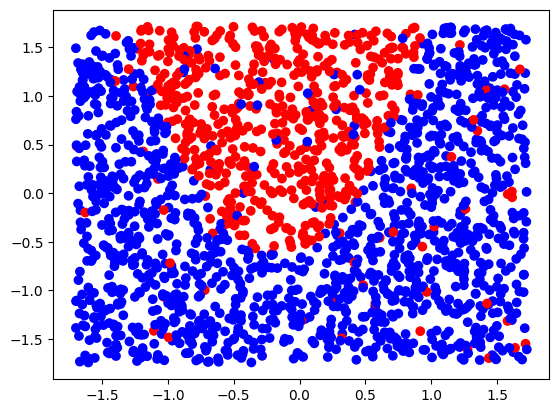


Visualizing Test Set:


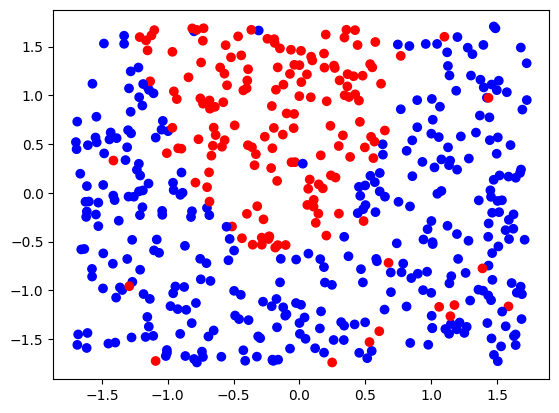

In [26]:
# Load and display data
df2 = pd.read_csv(os.path.join(folder_path,'DF2.csv'))
df2 = df2.values
# Data preparation for DF2
X2 = df2[:, :2]
y2 = df2[:, 2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# Standard scaling
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)
print("\nVisualizing Training Set:")
visualize_data(X2_train_scaled, y2_train)
print("\nVisualizing Test Set:")
visualize_data(X2_test_scaled, y2_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [22]:
# Define RBF kernel
def rbf_kernel(X, Y, sigma):
    pairwise_sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
    K = np.exp(-pairwise_sq_dists / (2 * sigma**2))
    return K


In [ ]:
# Grid search over C and sigma
C_values = [0.1, 1, 10, 100]
sigma_values = [0.1, 0.5, 1, 5, 10]
best_accuracy = 0
best_params = {'C': None, 'sigma': None}

for C in C_values:
    for sigma in sigma_values:
        n_samples = X2_train_scaled.shape[0]
        alpha = cp.Variable(n_samples)
        K = rbf_kernel(X2_train_scaled, X2_train_scaled, sigma)
        Y = np.outer(y2_train, y2_train)
        P = np.multiply(Y, K)
        P = 0.5 * (P + P.T)  # Ensure P is symmetric

        # Ensure that P is positive semi-definite
        eigvals = np.linalg.eigvalsh(P)
        if np.any(eigvals < 0):
            P += np.eye(P.shape[0]) * (-np.min(eigvals) + 1e-5)  # Regularize to make positive semi-definite

        # Solve optimization problem
        P = cp.psd_wrap(P)
        objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P))
        constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(alpha, y2_train)) == 0]
        problem = cp.Problem(objective, constraints)
        problem.solve(solver=cp.SCS, verbose=True)

        alpha_opt = alpha.value

        # Identify support vectors
        support_vector_indices = np.where(alpha_opt > 1e-5)[0]
        print(f"Number of support vectors: {len(support_vector_indices)}")
        print(f"Support vector indices: {support_vector_indices}")

        support_vectors = X2_train_scaled[support_vector_indices]
        alphas = alpha_opt[support_vector_indices]
        y_support = y2_train[support_vector_indices]
        K_test = rbf_kernel(X2_test_scaled, support_vectors, sigma)
        decision_values = np.dot(K_test, alphas * y_support)
        predictions = np.sign(decision_values)

        accuracy = np.mean(predictions == y2_test)
        print(f'C={C}, sigma={sigma}, accuracy={accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['C'] = C
            best_params['sigma'] = sigma

print(f'Best parameters: C={best_params["C"]}, sigma={best_params["sigma"]}')
print(f'Best accuracy: {best_accuracy}')

# Train the final model with the best parameters
C_final = best_params['C']
sigma_final = best_params['sigma']

n_samples_final = X2_train_scaled.shape[0]
alpha_final = cp.Variable(n_samples_final)
K_final = rbf_kernel(X2_train_scaled, X2_train_scaled, sigma_final)
Y_final = np.outer(y2_train, y2_train)
P_final = np.multiply(Y_final, K_final)
P_final = 0.5 * (P_final + P_final.T)  # Ensure P is symmetric

# Ensure that P is positive semi-definite
eigvals_final = np.linalg.eigvalsh(P_final)
if np.any(eigvals_final < 0):
    P_final += np.eye(P_final.shape[0]) * (-np.min(eigvals_final) + 1e-5)  # Regularize to make positive semi-definite

# Solve optimization problem
P_final = cp.psd_wrap(P_final)
objective_final = cp.Maximize(cp.sum(alpha_final) - 0.5 * cp.quad_form(alpha_final, P_final))
constraints_final = [alpha_final >= 0, alpha_final <= C_final, cp.sum(cp.multiply(alpha_final, y2_train)) == 0]
problem_final = cp.Problem(objective_final, constraints_final)
problem_final.solve(solver=cp.SCS, verbose=True)

alpha_opt_final = alpha_final.value

                                     CVXPY                                     
                                     v1.3.4                                    
(CVXPY) Jun 28 03:06:24 PM: Your problem has 1980 variables, 3 constraints, and 0 parameters.
(CVXPY) Jun 28 03:06:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 28 03:06:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 28 03:06:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 28 03:06:24 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 28 03:06:24 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Con

Predict the class of each entry in the test set using your learned model.

In [ ]:
# Identify support vectors
support_vector_indices_final = np.where(alpha_opt_final > 1e-5)[0]
print(f"Number of support vectors: {len(support_vector_indices_final)}")
print(f"Support vector indices: {support_vector_indices_final}")

support_vectors_final = X2_train_scaled[support_vector_indices_final]
alphas_final = alpha_opt_final[support_vector_indices_final]
y_support_final = y2_train[support_vector_indices_final]
K_test_final = rbf_kernel(X2_test_scaled, support_vectors_final, sigma_final)
decision_values_final = np.dot(K_test_final, alphas_final * y_support_final)
predictions_final = np.sign(decision_values_final)

print("Predictions:", predictions_final)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [ ]:
print(classification_report(y2_test, predictions_final))

## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.


Visualizing Training Set:


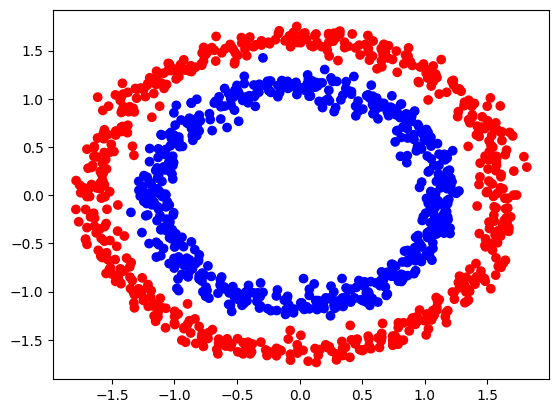


Visualizing Test Set:


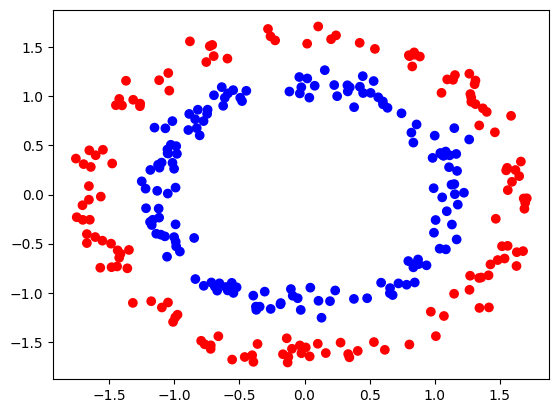

In [30]:
# Load and display data
df3 = pd.read_csv(os.path.join(folder_path,'DF3.csv'))
df3 = df3.values
# Data preparation for DF2
X3 = df3[:, :2]
y3 = df3[:, 2]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
# Standard scaling
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)
print("\nVisualizing Training Set:")
visualize_data(X3_train_scaled, y3_train)
print("\nVisualizing Test Set:")
visualize_data(X3_test_scaled, y3_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [31]:
# Calculate Gram matrix
gram_matrix = (np.dot(X3_train_scaled, X3_train_scaled.T) + 1) ** 2
gram_matrix = 0.5 * (gram_matrix + gram_matrix.T)

# Define the SVM optimization problem
num_samples = len(y3_train)
lagrange_multipliers = cp.Variable(num_samples)
P = cp.multiply(np.outer(y3_train, y3_train), gram_matrix)
P = 0.5 * (P + P.T)
P = cp.atoms.affine.wraps.psd_wrap(P)
objective_function = cp.Maximize(cp.sum(lagrange_multipliers) - 0.5 * cp.quad_form(lagrange_multipliers, P))
constraints = [lagrange_multipliers >= 0, lagrange_multipliers <= 1.0, cp.sum(cp.multiply(lagrange_multipliers, y3_train)) == 0]
optimization_problem = cp.Problem(objective_function, constraints)

# Solve the optimization problem
optimization_problem.solve()
optimal_lagrange_multipliers = lagrange_multipliers.value

# Extract support vectors
support_vectors = optimal_lagrange_multipliers > 1e-5
support_vector_indices = np.flatnonzero(support_vectors)

# Calculate bias
gram_matrix_sv = gram_matrix[support_vectors][:, support_vectors]
alpha_y_sv = optimal_lagrange_multipliers[support_vectors] * y3_train[support_vectors]
bias = np.mean(y3_train[support_vectors] - np.dot(gram_matrix_sv, alpha_y_sv))

Predict the class of each entry in the test set using your learned model.

In [32]:
# Predict the class labels for the test set
support_vectors_train = X3_train_scaled[support_vectors]
K_test = (np.dot(X3_test_scaled, X3_train_scaled.T) + 1) ** 2
decision_function = np.dot(K_test[:, support_vector_indices], alpha_y_sv) + bias
predictions = np.sign(decision_function)

# Print the predictions
print('Predictions:', predictions)

Predictions: [ 1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.
 -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
 -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.
  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1.  1.  1.  1.  1.  1.  1. -1. -

Use classification_report function (from sklearn) to get the accuracy of your model.

In [33]:
# Generate a classification report
print('Classification Report:\n', classification_report(y3_test, predictions))

Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.99      1.00       152
         1.0       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

